Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [20, 20]}, font_scale=1.4)

reading names file

In [2]:
names_file = open('D:/Hypothyroid_detection/notebook/DATA/allhypo.names','r')
print(names_file.read())

;
; Thyroid disease records supplied by the Garavan Institute and J. Ross
; Quinlan, New South Wales Institute, Syndney, Australia.
;
; 1987.
;

hypothyroid, primary hypothyroid, compensated hypothyroid,
secondary hypothyroid,
negative.			|  classes

age:				continuous.
sex:				M, F.
on thyroxine:			f, t.
query on thyroxine:		f, t.
on antithyroid medication:	f, t.
sick:				f, t.
pregnant:			f, t.
thyroid surgery:		f, t.
I131 treatment:			f, t.
query hypothyroid:		f, t.
query hyperthyroid:		f, t.
lithium:			f, t.
goitre:				f, t.
tumor:				f, t.
hypopituitary:			f, t.
psych:				f, t.
TSH measured:			f, t.
TSH:				continuous.
T3 measured:			f, t.
T3:				continuous.
TT4 measured:			f, t.
TT4:				continuous.
T4U measured:			f, t.
T4U:				continuous.
FTI measured:			f, t.
FTI:				continuous.
TBG measured:			f, t.
TBG:				continuous.
referral source:		WEST, STMW, SVHC, SVI, SVHD, other.



In [3]:
names_file.close()

lets get the feature names from names file

In [4]:
features = ['age',
            'sex',
            'on thyroxine',
            'query on thyroxine',
            'on antithyroid medication',
            'sick',
            'pregnant',
            'thyroid surgery',
            'I131 treatment',
            'query hypothyroid',
            'query hyperthyroid',
            'lithium',
            'goitre',
            'tumor',
            'hypopituitary',
            'psych',
            'TSH measured',
            'TSH',
            'T3 measured',
            'T3',
            'TT4 measured',
            'TT4',
            'T4U measured',
            'T4U',
            'FTI measured',
            'FTI',
            'TBG measured',
            'TBG',
            'referral source',
            'class'
           ]

lets read the train data and test data and combine it to get a full dataframe

In [5]:
df1 = pd.read_csv('D:/Hypothyroid_detection/notebook/DATA/allhypo.data',names=features)
df2 = pd.read_csv('D:/Hypothyroid_detection/notebook/DATA/allhypo.test',names=features)
df = pd.concat([df1,df2],ignore_index=True) 
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative.|2807


Checking description and info 

In [6]:
df.describe().T

,count,unique,top,freq
age,3772,175,59,75
sex,3772,3,F,2480
on thyroxine,3772,2,f,3308
query on thyroxine,3772,2,f,3722
on antithyroid medication,3772,2,f,3729
sick,3772,2,f,3625
pregnant,3772,2,f,3719
thyroid surgery,3772,2,f,3719
I131 treatment,3772,2,f,3713
query hypothyroid,3772,2,f,3538


feature engineering of class column

In [7]:
df['class'] = df['class'].apply(lambda x:x.split('.')[0])

In [8]:
df.describe().T

,count,unique,top,freq
age,3772,175,59,75
sex,3772,3,F,2480
on thyroxine,3772,2,f,3308
query on thyroxine,3772,2,f,3722
on antithyroid medication,3772,2,f,3729
sick,3772,2,f,3625
pregnant,3772,2,f,3719
thyroid surgery,3772,2,f,3719
I131 treatment,3772,2,f,3713
query hypothyroid,3772,2,f,3538


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

Eventhough there are no nan values showing in info,we can see that in description top values for TSH,T3,TT4,T4U,FTI and TBG are '?', so '?' can be considered as nan values

we can see that df[TBG] has only one unique value and it is '?',so we can delete that column

In [10]:
df['TBG'].value_counts()

TBG
?    3772
Name: count, dtype: int64

In [11]:
del df["TBG"]

In [12]:
df["class"].value_counts()

class
negative                   3481
compensated hypothyroid     194
primary hypothyroid          95
secondary hypothyroid         2
Name: count, dtype: int64

In [13]:
# replace positive cases to '1' and negatives to '0'
df["class"] = df["class"].map({'negative':0,'compensated hypothyroid':1,'primary hypothyroid':1,'secondary hypothyroid':1})

In [14]:
df["pregnant"].value_counts()

pregnant
f    3719
t      53
Name: count, dtype: int64

In [15]:
# replace all  false('f') values to '0' and true('t') values to '1'
df=df.replace({"t":1,"f":0})

In [16]:
# replace '?' to nan
df=df.replace({"?":np.NAN})

In [17]:
df['sex']=df['sex'].replace({"F":1,"M":0})

In [18]:
df.head().T

,0,1,2,3,4
age,41,23,46,70,70
sex,1.0,1.0,0.0,1.0,1.0
on thyroxine,0,0,0,1,0
query on thyroxine,0,0,0,0,0
on antithyroid medication,0,0,0,0,0
sick,0,0,0,0,0
pregnant,0,0,0,0,0
thyroid surgery,0,0,0,0,0
I131 treatment,0,0,0,0,0
query hypothyroid,0,0,0,0,0


In [19]:
df["referral source"].value_counts()

referral source
other    2201
SVI      1034
SVHC      386
STMW      112
SVHD       39
Name: count, dtype: int64

Referral source can be deleted as it doesnt contribute physiologically for hypothyroidism

In [20]:
del df["referral source"]

In [21]:
# checking for null values

df.isnull().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
TBG measured                   0
class                          0
dtype: int64

The highest missing values are for feature 'T3' and it is 769,which is about 0.20%.So the missing values can be imputed

In [22]:
df.dtypes

age                           object
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                           object
T3 measured                    int64
T3                            object
TT4 measured                   int64
TT4                           object
T4U measured                   int64
T4U                           object
FTI measured                   int64
FTI                           object
TBG measured                   int64
c

In [23]:
# dealing with object data types
cols = df.columns[df.dtypes=='object']
cols

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'], dtype='object')

In [24]:
for feat in cols:
    df[cols] = df[cols].astype('float')

In [25]:
df.dtypes

age                          float64
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
TBG measured                   int64
c

In [26]:
df.isnull().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
TBG measured                   0
class                          0
dtype: int64

## EDA

In [27]:
# create a list of continous feat and binary feat
cont_feat = ['age','TSH','T3','TT4','T4U','FTI']
all_feat = list(df.columns)
binary_feat = [feat for feat in all_feat if feat not in cont_feat]
binary_feat

['sex',
 'on thyroxine',
 'query on thyroxine',
 'on antithyroid medication',
 'sick',
 'pregnant',
 'thyroid surgery',
 'I131 treatment',
 'query hypothyroid',
 'query hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH measured',
 'T3 measured',
 'TT4 measured',
 'T4U measured',
 'FTI measured',
 'TBG measured',
 'class']

histograms of continous features

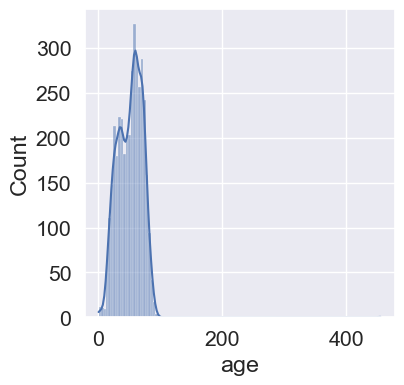

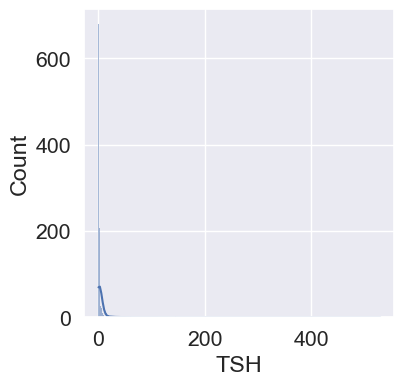

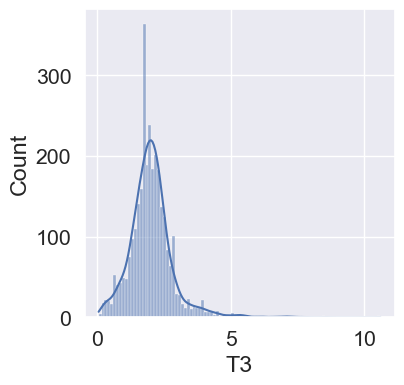

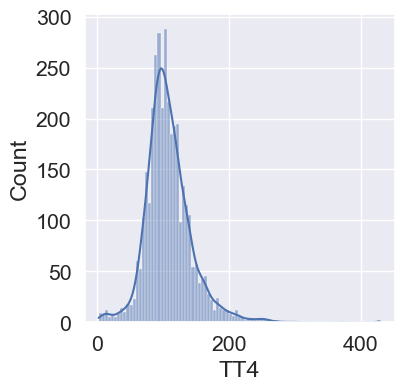

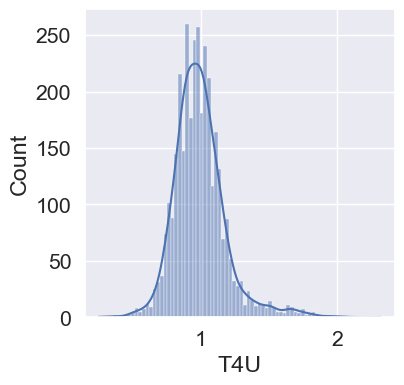

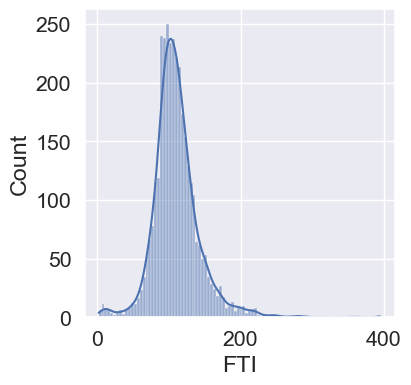

In [28]:
for feature in cont_feat:
    plt.figure(figsize=(4,4))
    sns.histplot(data=df,x=feature,kde=True)
    print('\n')
    plt.show()

In [29]:
df[df['age']>100]

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,class
1364,455.0,1.0,0,0,0,0,0,0,0,0,...,1,2.0,1,118.0,1,1.13,1,104.0,0,0


age is never 455,it might be an error,so could be replaced by mode 59

In [30]:
df['age'].iloc[1364]=59

C:\Users\jayku\AppData\Local\Temp\ipykernel_13060\4004464139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'].iloc[1364]=59


count plot of binary features with hue as class

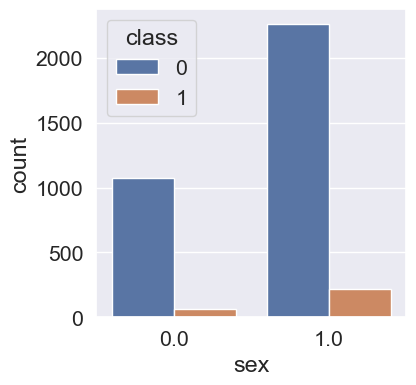

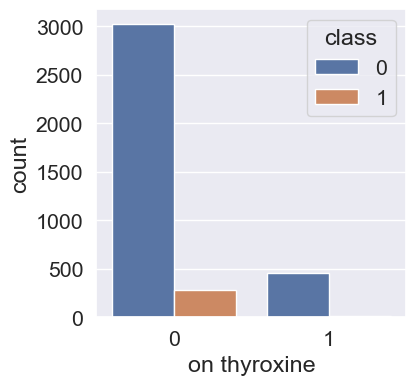

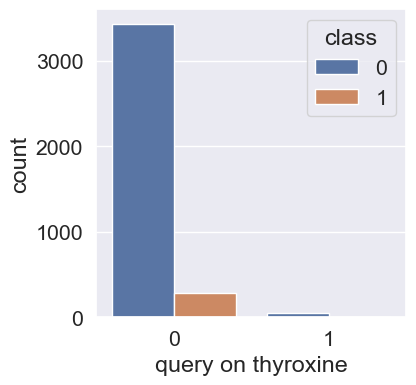

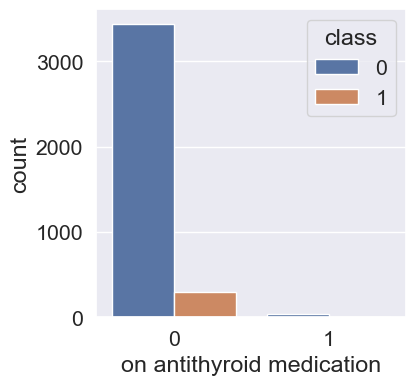

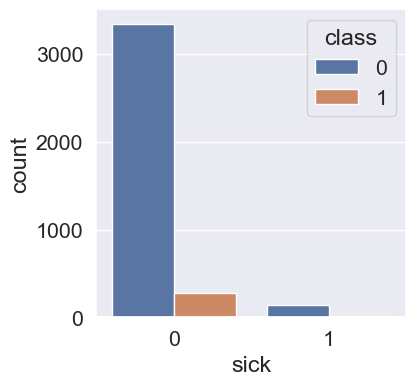

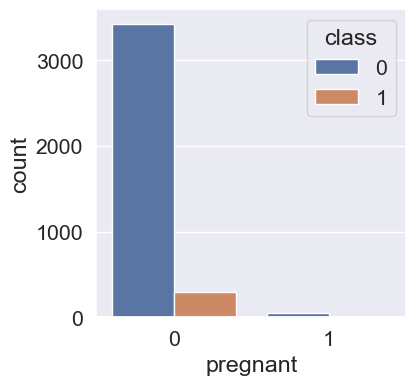

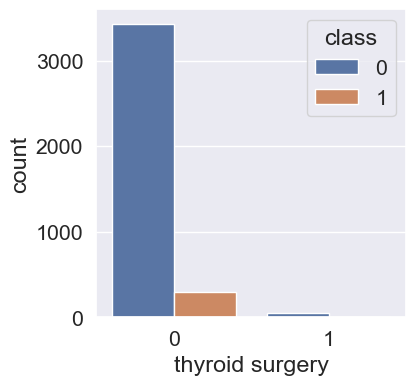

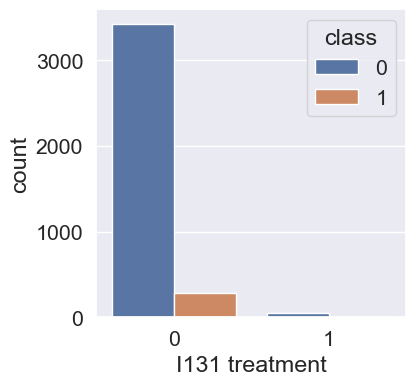

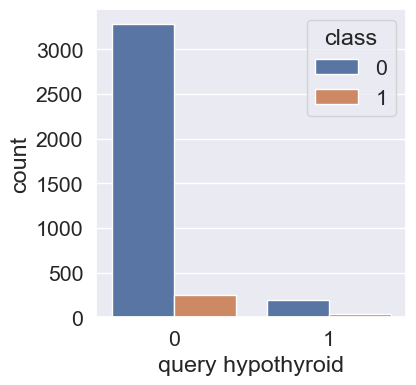

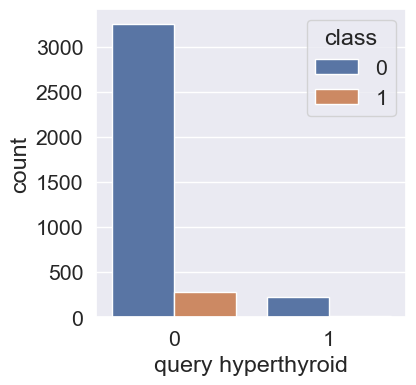

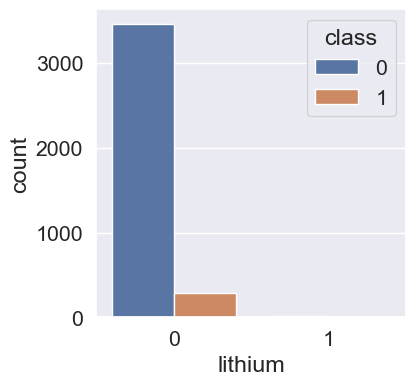

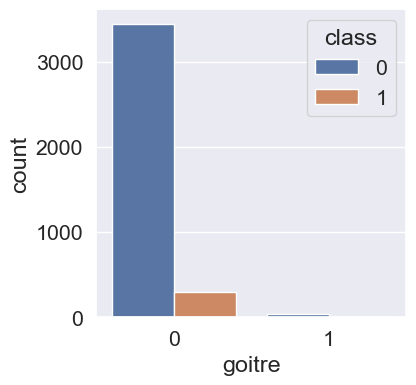

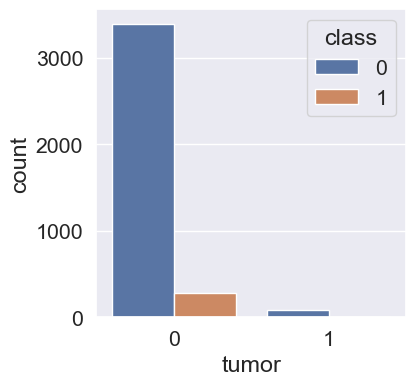

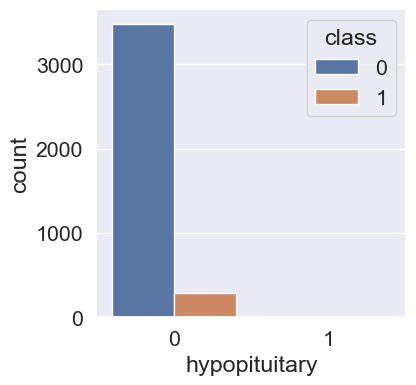

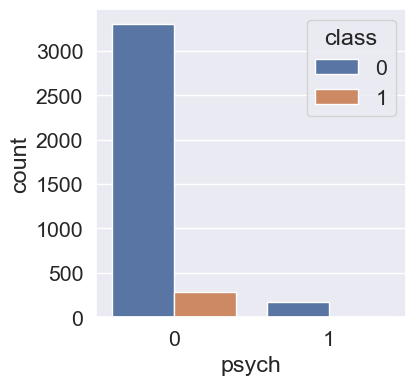

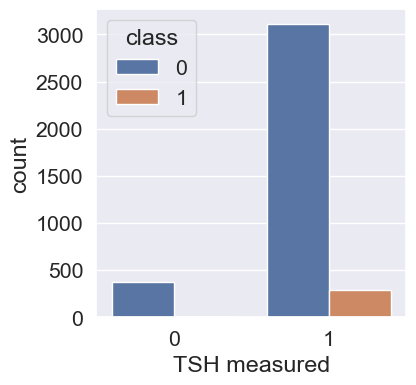

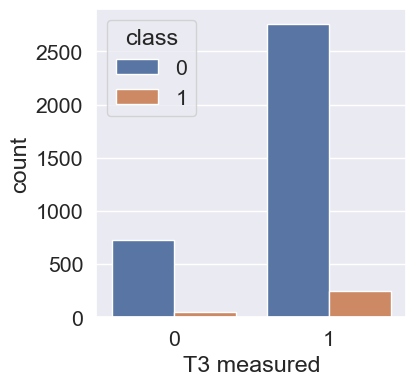

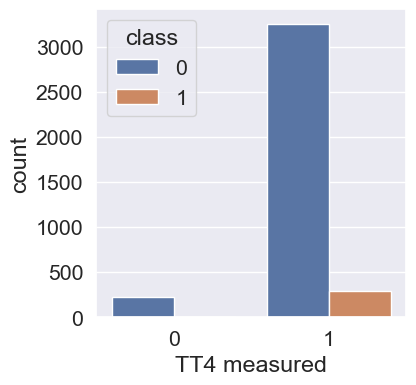

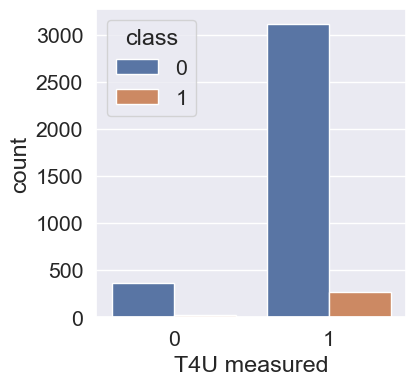

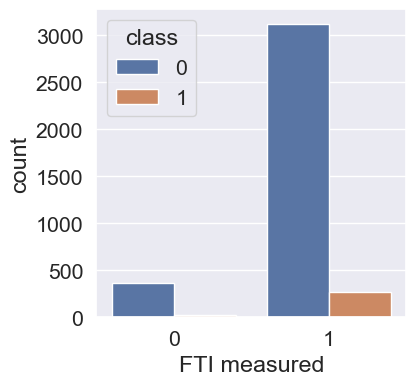

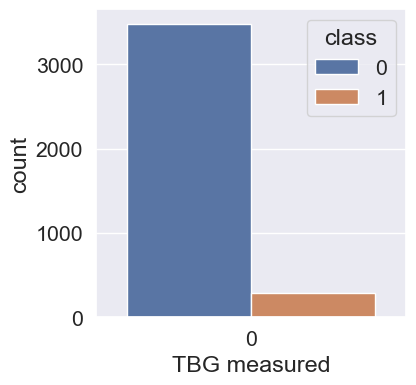

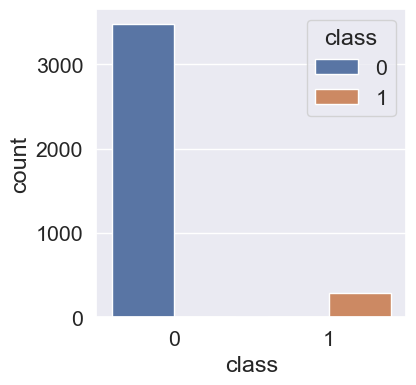

In [31]:

for feature in binary_feat:
    plt.figure(figsize=(4,4))
    sns.countplot(data=df,x=feature,hue='class')
    print('\n')
    plt.show()

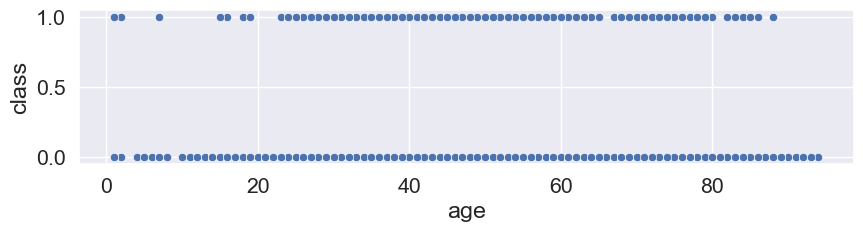

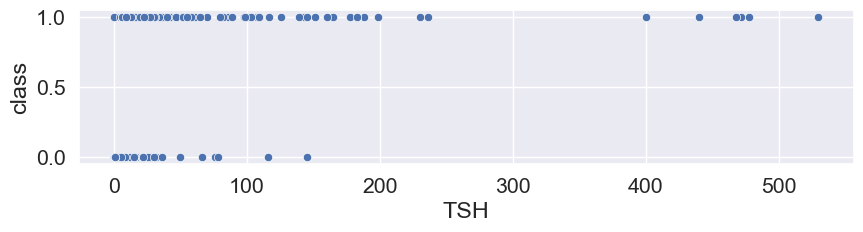

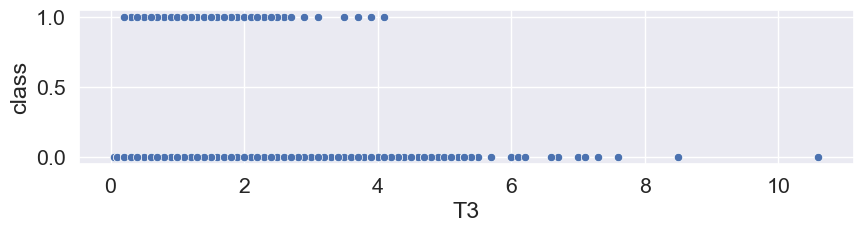

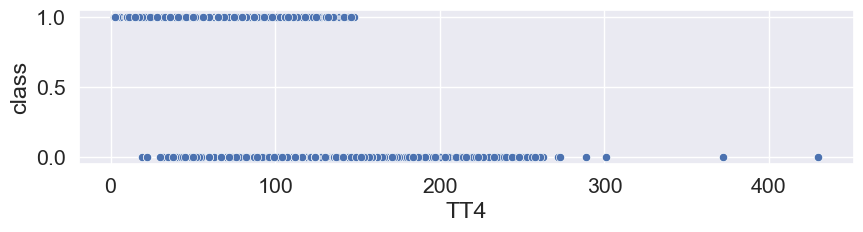

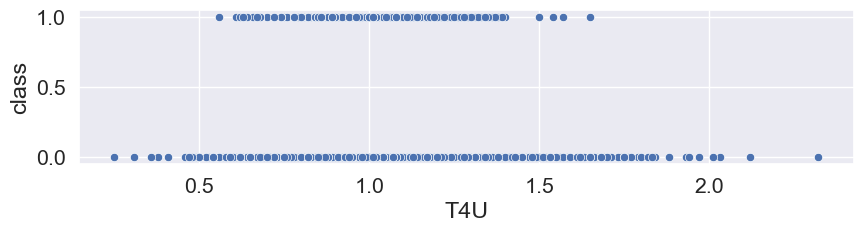

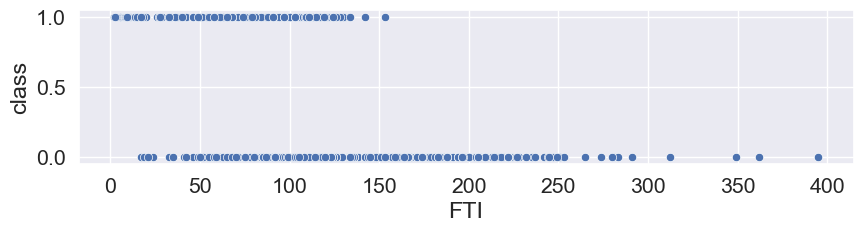

In [32]:
for feature in cont_feat:
    plt.figure(figsize=(10,2))
    sns.scatterplot(data=df,x=feature,y='class')
    print('\n')
    plt.show()

dealing with nan values

In [33]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [34]:
df['sex'].value_counts()

sex
1.0    2480
0.0    1142
Name: count, dtype: int64

In [35]:
df['sex'] = df['sex'].fillna(0.0)

In [36]:
nan_feat = ['age','TSH','T3','TT4','T4U','FTI']
for feat in nan_feat:
    df[feat] = imputer.fit_transform(df[[feat]])

In [37]:
df.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
class                        0
dtype: int64

In [38]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,class
0,41.0,1.0,0,0,0,0,0,0,0,0,...,1,2.5,1,125.0,1,1.14,1,109.0,0,0
1,23.0,1.0,0,0,0,0,0,0,0,0,...,1,2.0,1,102.0,0,0.98,0,107.0,0,0
2,46.0,0.0,0,0,0,0,0,0,0,0,...,0,2.0,1,109.0,1,0.91,1,120.0,0,0
3,70.0,1.0,1,0,0,0,0,0,0,0,...,1,1.9,1,175.0,0,0.98,0,107.0,0,0
4,70.0,1.0,0,0,0,0,0,0,0,0,...,1,1.2,1,61.0,1,0.87,1,70.0,0,0


heatmap to see the correlation between features

<Axes: >

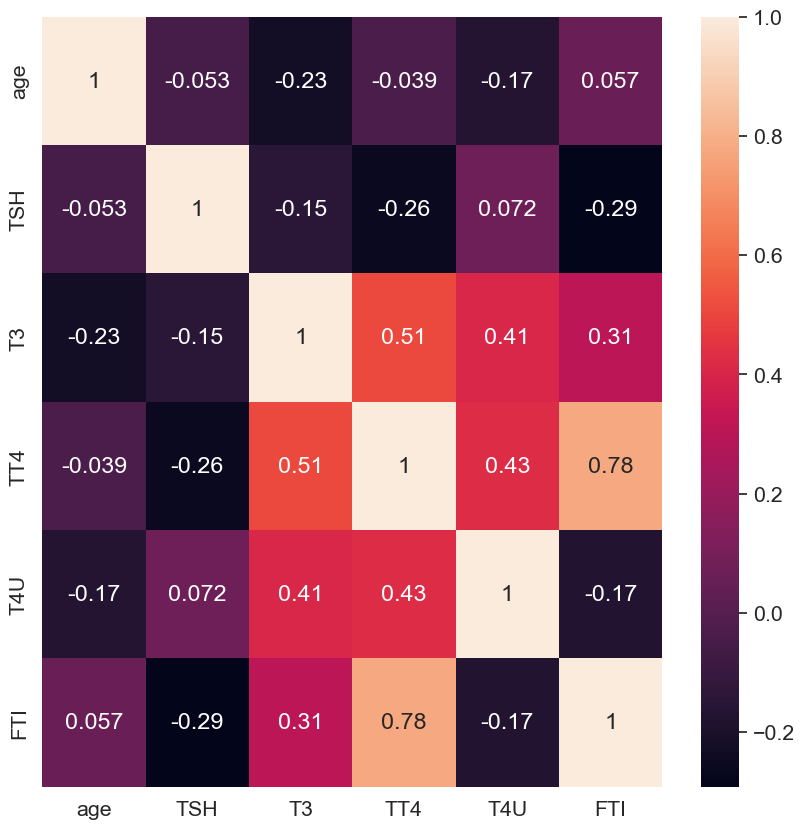

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(df[cont_feat].corr(),annot=True)

## Model Training

In [40]:
## Independent and dependent features
X = df.drop(labels=['class'],axis=1)
y = df['class']

In [41]:
X

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured
0,41.0,1.0,0,0,0,0,0,0,0,0,...,1.30,1,2.5,1,125.0,1,1.14,1,109.0,0
1,23.0,1.0,0,0,0,0,0,0,0,0,...,4.10,1,2.0,1,102.0,0,0.98,0,107.0,0
2,46.0,0.0,0,0,0,0,0,0,0,0,...,0.98,0,2.0,1,109.0,1,0.91,1,120.0,0
3,70.0,1.0,1,0,0,0,0,0,0,0,...,0.16,1,1.9,1,175.0,0,0.98,0,107.0,0
4,70.0,1.0,0,0,0,0,0,0,0,0,...,0.72,1,1.2,1,61.0,1,0.87,1,70.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,1.0,0,0,0,0,0,0,0,0,...,1.40,0,2.0,0,103.0,0,0.98,0,107.0,0
3768,68.0,1.0,0,0,0,0,0,0,0,0,...,1.00,1,2.1,1,124.0,1,1.08,1,114.0,0
3769,74.0,1.0,0,0,0,0,0,0,0,0,...,5.10,1,1.8,1,112.0,1,1.07,1,105.0,0
3770,72.0,0.0,0,0,0,0,0,0,0,0,...,0.70,1,2.0,1,82.0,1,0.94,1,87.0,0


In [42]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

In [43]:
X_train.shape

(2640, 27)

In [44]:
X_train.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured
210,64.0,1.0,0,0,0,0,0,0,0,0,...,1.40,0,2.0,0,103.0,0,0.98,0,107.0,0
3192,71.0,1.0,0,0,0,0,0,0,0,0,...,0.02,1,2.2,1,152.0,1,0.78,1,196.0,0
61,42.0,0.0,0,0,0,0,0,0,0,0,...,0.02,1,2.6,1,138.0,1,1.58,1,88.0,0
733,72.0,1.0,0,0,0,0,0,0,0,0,...,4.00,1,3.2,1,106.0,1,0.87,1,122.0,0
2260,37.0,1.0,0,0,0,0,0,0,0,0,...,1.40,0,2.0,0,103.0,0,0.98,0,107.0,0


In [45]:
X_test.shape

(1132, 27)

In [46]:
y_train

210     0
3192    0
61      0
733     0
2260    0
       ..
1164    0
500     0
2989    0
421     1
1829    1
Name: class, Length: 2640, dtype: int64

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix  

In [48]:
def evaluate_model(true, predicted):
    class_report = classification_report(true,predicted)
    cm = confusion_matrix(true,predicted)
    return class_report,cm

In [49]:
models = {'DecisionTreeClassifier':DecisionTreeClassifier(),
         'RandomForestClassifier':RandomForestClassifier(),
          'LogisticRegression':LogisticRegression()
         }

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    
        #Make Predictions
    y_pred=model.predict(X_test)
    class_report,cm=evaluate_model(y_test,y_pred)
    print(list(models.keys())[i])
    print('Model Training Performance')
    print(class_report)
    print('confusion matrix')
    print(cm)
    
    
    print('='*35)
    print('\n')

DecisionTreeClassifier
Model Training Performance
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1051
           1       0.90      1.00      0.95        81

    accuracy                           0.99      1132
   macro avg       0.95      1.00      0.97      1132
weighted avg       0.99      0.99      0.99      1132

confusion matrix
[[1042    9]
 [   0   81]]




RandomForestClassifier
Model Training Performance
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1051
           1       0.90      0.99      0.94        81

    accuracy                           0.99      1132
   macro avg       0.95      0.99      0.97      1132
weighted avg       0.99      0.99      0.99      1132

confusion matrix
[[1042    9]
 [   1   80]]


LogisticRegression
Model Training Performance
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1051
           1       0.89      0.59      0.71        81

    accuracy                           0.97      1132
   macro avg       0.93      0.79      0.85      1132
weighted avg       0.96      0.97      0.96      1132

confusion matrix
[[1045    6]
 [  33   48]]




d:\Hypothyroid_detection\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Conclusion: Since the dataset is imbalnced,f1 score can be compared.It is observed that f1 score is greater for Decision tree classifier and it is considered as the best model.